In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df = df.rename(columns={' ':'income'})

In [4]:
df.shape

(48842, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
#checking for null
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
num_cols = df.select_dtypes(exclude='object').columns
cat_cols = df.select_dtypes(include='object').columns

In [8]:
##exploring Numerical Columns
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [9]:
##exploring Categorical Variables
for col in cat_cols:
    print(f"""Unique Categories for {col} are:
{df[col].unique()}
{'=='*40}""")

Unique Categories for workclass are:
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unique Categories for education are:
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Unique Categories for marital-status are:
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Unique Categories for occupation are:
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
Unique Categories for relationship are:
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
Unique Categories for race are:
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer

- `workclass`, `occupation`, and `native-country` columns has  '?'  as a placeholder for missing value.


In [10]:
#exploring '?' count
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
#exploring target variable
income = df['income'].value_counts(normalize=True)
round(income*100, 2).astype(str)+'%'

<=50K    76.07%
>50K     23.93%
Name: income, dtype: object

**Observations:**
- The dataset doesn't have any null values, but it contains `?` as a placeholder for the missing value.
- The dataset is imbalanced, as it contains 76% observations that has income less than 50k abd 24% observations that has income grater than 50k

## Data Cleaning

In [12]:
#replacing '?' by np.nan
df = df.replace('?', np.nan)
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [13]:
#imputing null values by model
null =df.isnull().any()
null_cols = []
for idx in null.index:
    if null[idx]:
        null_cols.append(idx)

In [14]:
null

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

In [15]:
null_cols

['workclass', 'occupation', 'native-country']

In [16]:
df['workclass'].value_counts(dropna=False)

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NaN                  2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [17]:
df.loc[df['workclass'].isnull()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,191846,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [18]:
df.groupby(by='education')['workclass'].agg(pd.Series.mode)

education
10th            Private
11th            Private
12th            Private
1st-4th         Private
5th-6th         Private
7th-8th         Private
9th             Private
Assoc-acdm      Private
Assoc-voc       Private
Bachelors       Private
Doctorate       Private
HS-grad         Private
Masters         Private
Preschool       Private
Prof-school     Private
Some-college    Private
Name: workclass, dtype: object

In [19]:
##imputing null values in 'workclass' column by 'private'
df['workclass'] = df['workclass'].fillna(value='Private')

In [20]:
ocp = df.groupby(by='education')['occupation', 'income'].agg(pd.Series.mode)
ocp

,occupation,income
education,,
10th,Other-service,<=50K
11th,Other-service,<=50K
12th,Other-service,<=50K
1st-4th,Other-service,<=50K
5th-6th,Other-service,<=50K
7th-8th,Craft-repair,<=50K
9th,Craft-repair,<=50K
Assoc-acdm,Adm-clerical,<=50K
Assoc-voc,Craft-repair,<=50K


In [21]:
##imputing null values of occupation by mode wrt the particular education level
for idx in ocp.index:
    mask = ((df['occupation'].isnull()) & (df['education']== idx))
    val = ocp.loc[idx]['occupation']
    df.loc[mask, 'occupation'] = val

In [22]:
df.loc[df['native-country'].isnull()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,NaN,<=50K
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,NaN,>50K
188,34,State-gov,513100,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,NaN,<=50K
253,42,Federal-gov,177937,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
48773,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,<=50K
48791,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,>50K


In [23]:
df.groupby(by='race')['native-country', 'income'].agg(pd.Series.mode)

,native-country,income
race,,
Amer-Indian-Eskimo,United-States,<=50K
Asian-Pac-Islander,United-States,<=50K
Black,United-States,<=50K
Other,United-States,<=50K
White,United-States,<=50K


In [24]:
##imputing null values in 'native-country' column by 'United-States'
df['native-country'] = df['native-country'].fillna(value='United-States')

In [25]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Exploratory Data Analysis

In [26]:
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

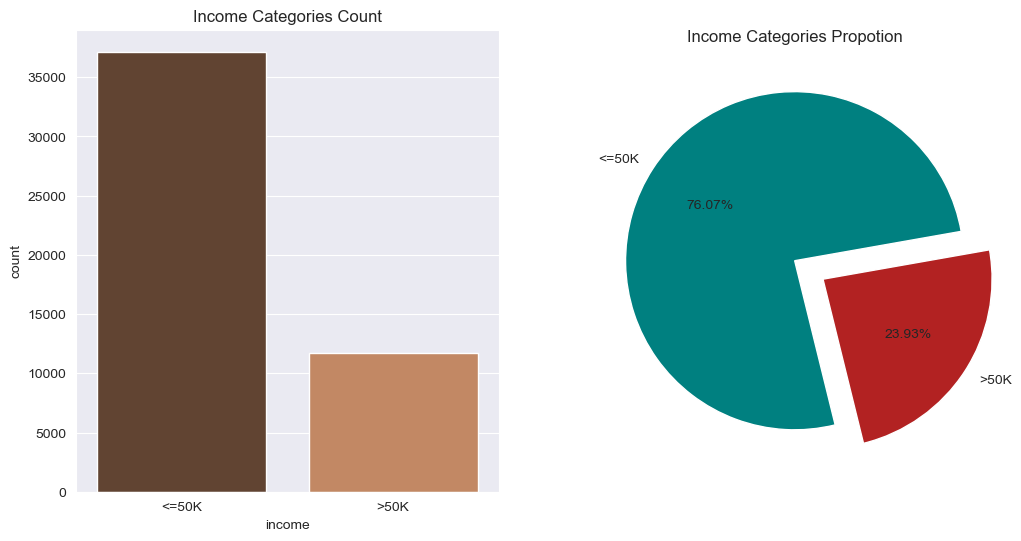

In [27]:
#target variable
plt.subplots(1, 2, figsize = (12,6))
plt.subplot(121)
sns.countplot(data=df, x ='income', palette='copper')
plt.title('Income Categories Count')

plt.subplot(122)
plt.pie(x = income,
       labels=income.index,
       startangle=10,
       explode=[0,0.2],
       shadow=False,
        colors= ['teal', 'firebrick'],
       autopct='%0.2f%%')
plt.title('Income Categories Propotion')
plt.show()

In [28]:
def cat_plot(column):
    
    vc = df[column].value_counts()  
    ct = pd.crosstab(index= df['income'], columns =df[column], margins=True)
    ft = ct/ct.loc['All',:]
    
    plt.subplots(1,2, figsize=(12,7))
    
    plt.subplot(121)
    sns.barplot(vc.values, vc.index, palette='deep')
    plt.xlabel("count")
    plt.ylabel(column)
    plt.title(f"Count of {column} categories")
        
    plt.subplot(122)
    colors =['crimson', 'sandybrown']
    for i, col in enumerate(vc.index[::-1]):
        left=None
        for j, idx in enumerate(ft.index[:-1]):
            width = ft[col][idx]
            plt.barh(y= col, width=width, left=left, color = colors[j])
            left=width
    plt.legend(['<=50K', '>50K'])
    plt.xlabel('Proportion')
    plt.title(f"Income Proportion by {column} categories")
    plt.show()

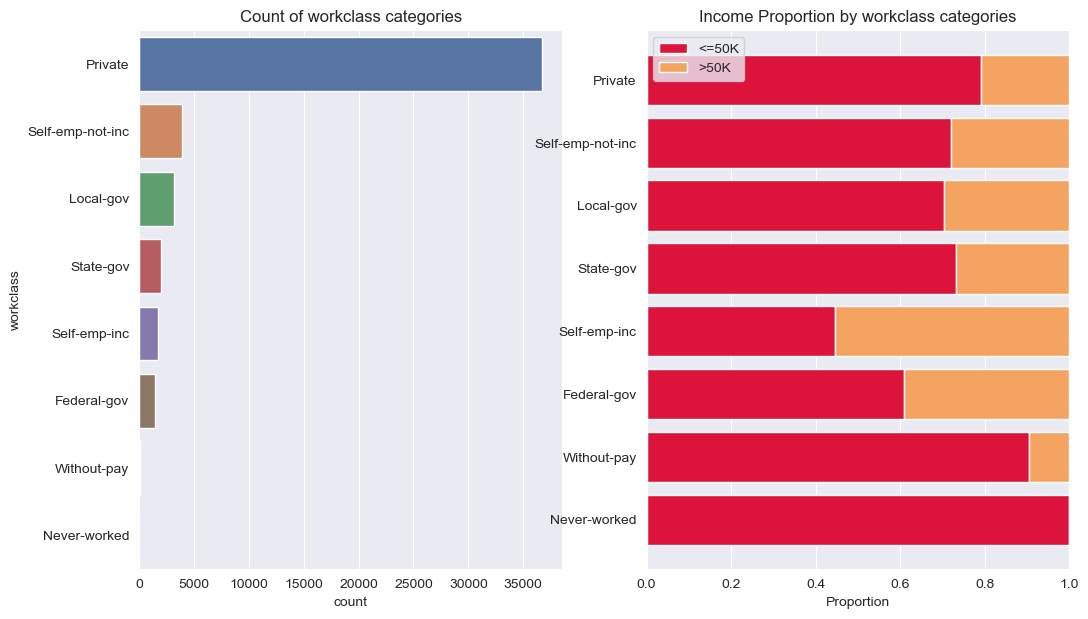

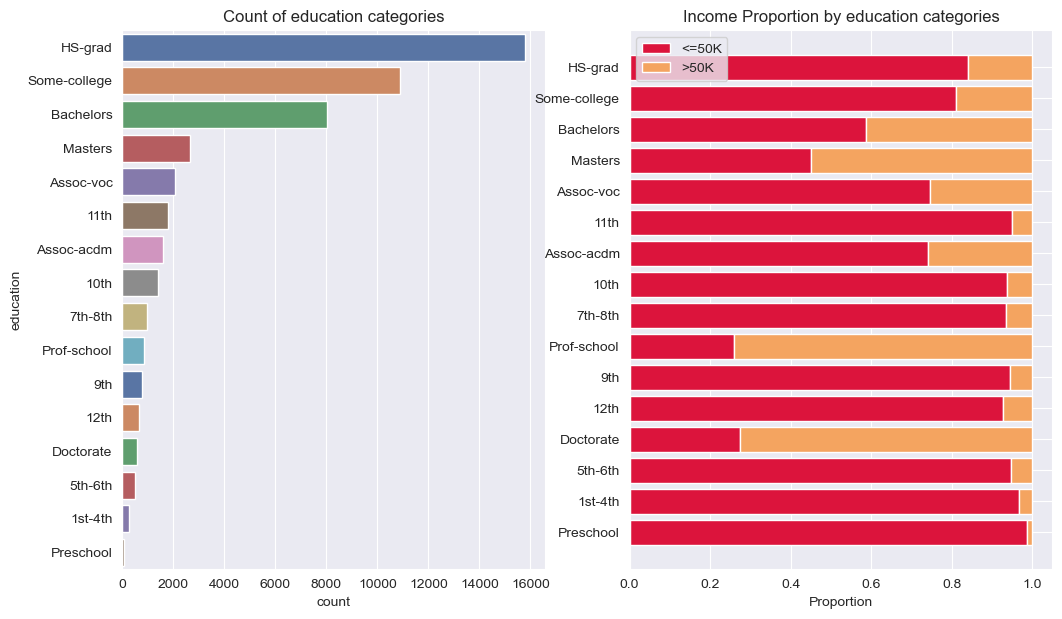

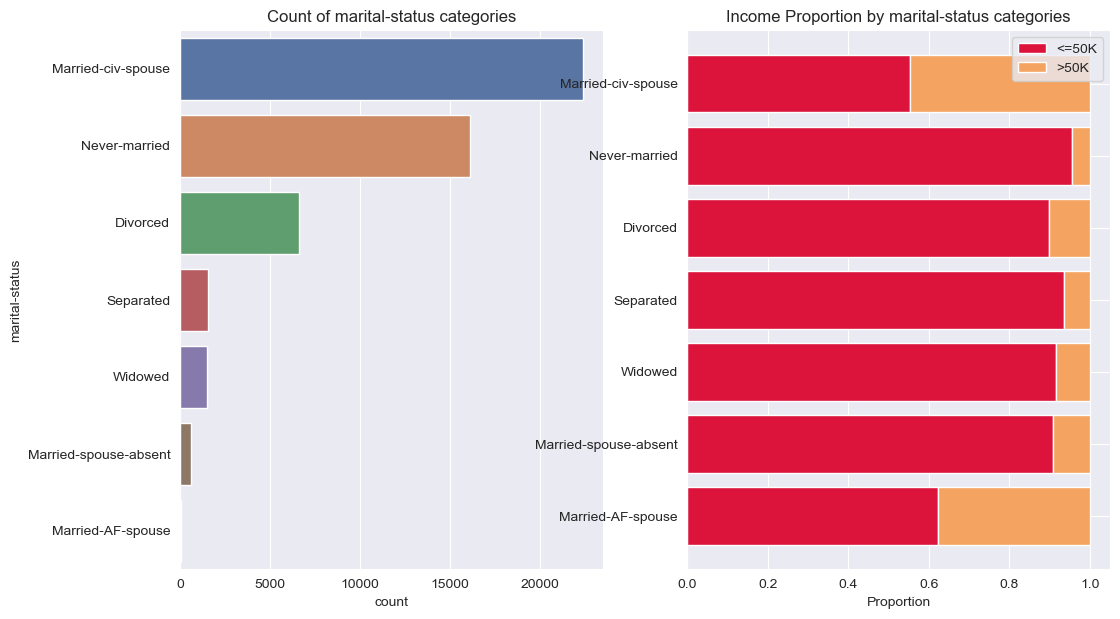

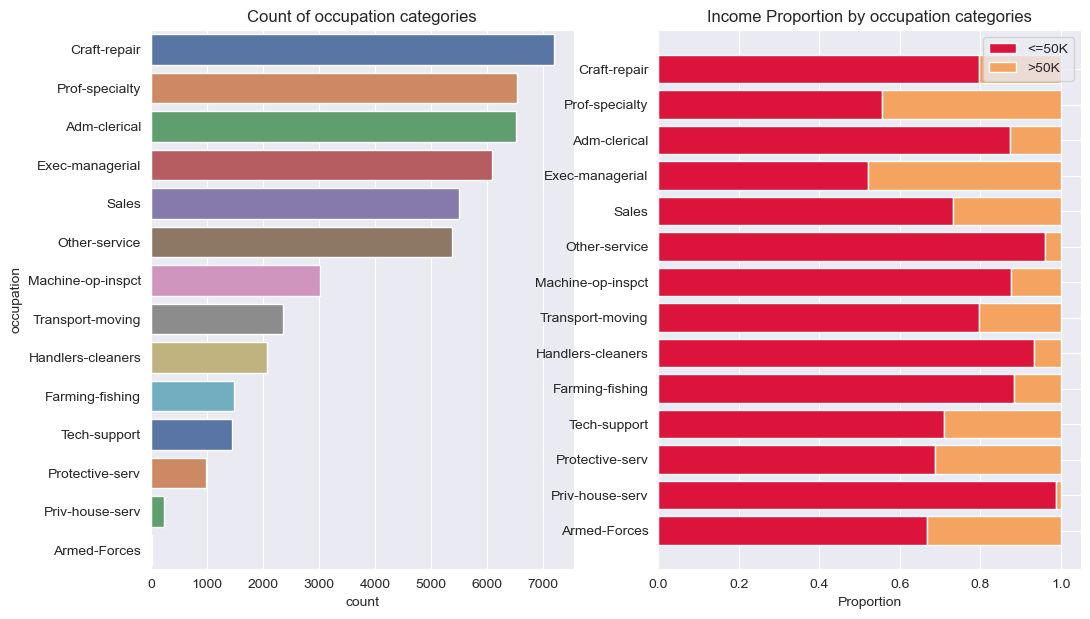

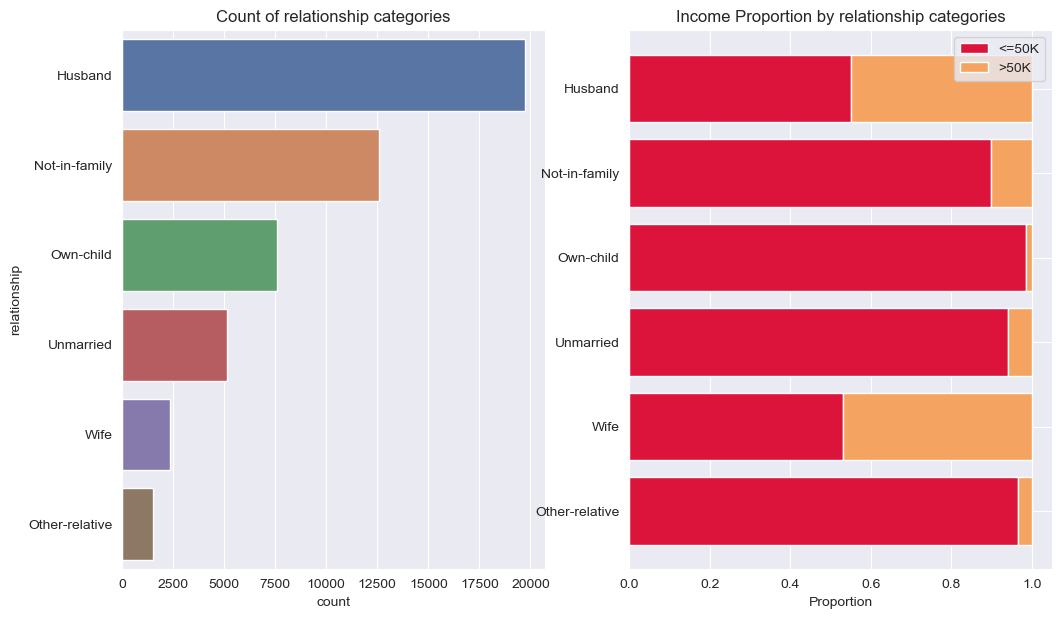

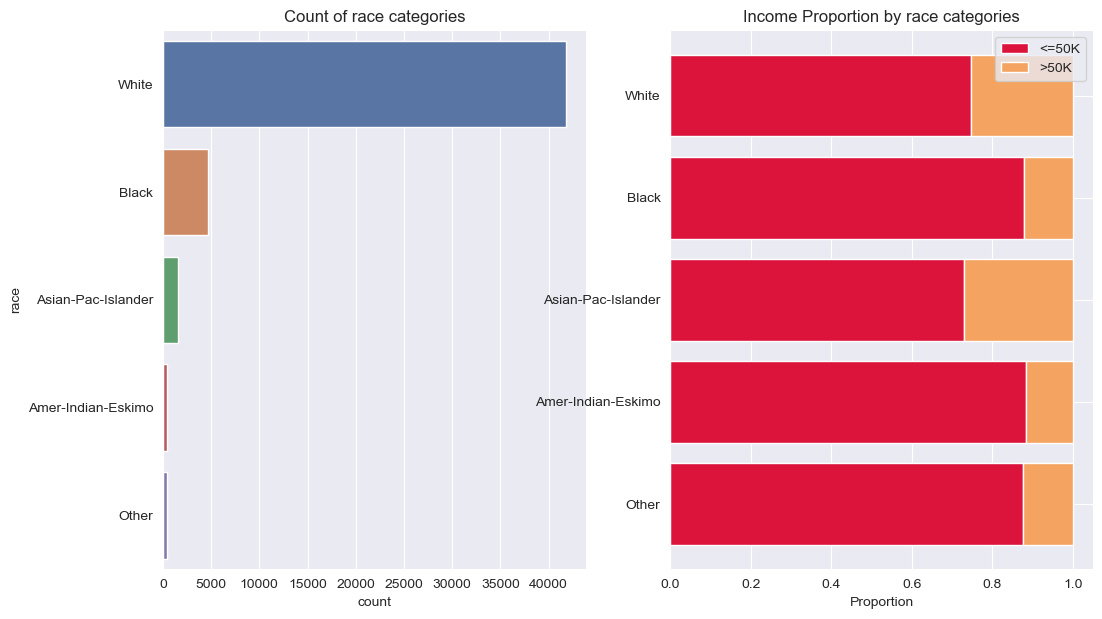

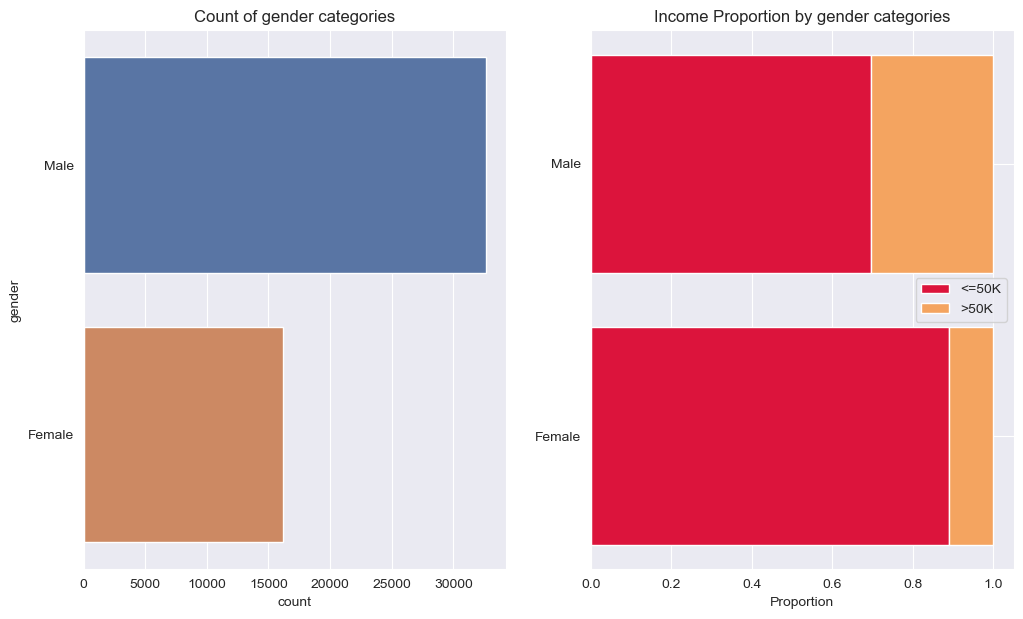

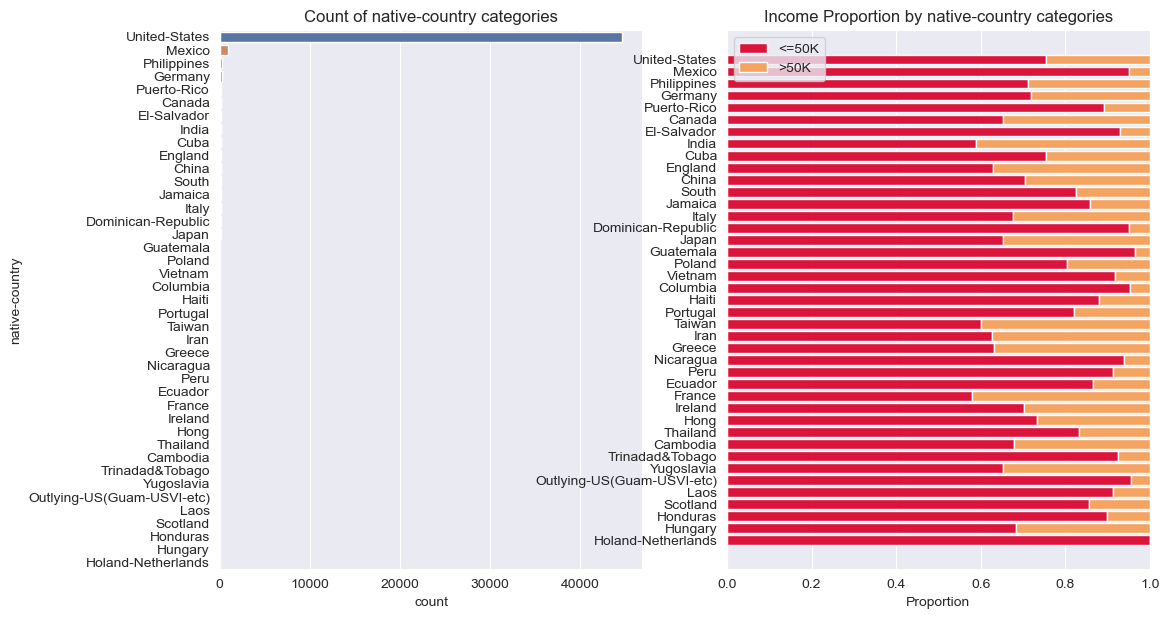

In [29]:
for col in cat_cols[:-1]:
    cat_plot(col)

In [30]:
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [31]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [32]:
def num_plot(col):
    plt.subplots(1,2, figsize =(12, 6))
    
    plt.subplot(121)
    sns.distplot(df.loc[df['income'] == '<=50K'][col], kde_kws={'label':'<=50K'})
    sns.distplot(df.loc[df['income'] == '>50K'][col], kde_kws={'label':'>50K'})
    #sns.histplot(data=df, x =col, kde=True, hue='income')
    plt.title(f'Distribution of {col}')
    
    plt.subplot(122)
    sns.boxplot(data =df, x = 'income', y =col, palette='Accent')
    sns.stripplot(data=df, x='income', y=col, palette='Accent', jitter=True, linewidth=0.5)
    plt.title(f'Distribution of {col} wrt income')
        
    plt.show()

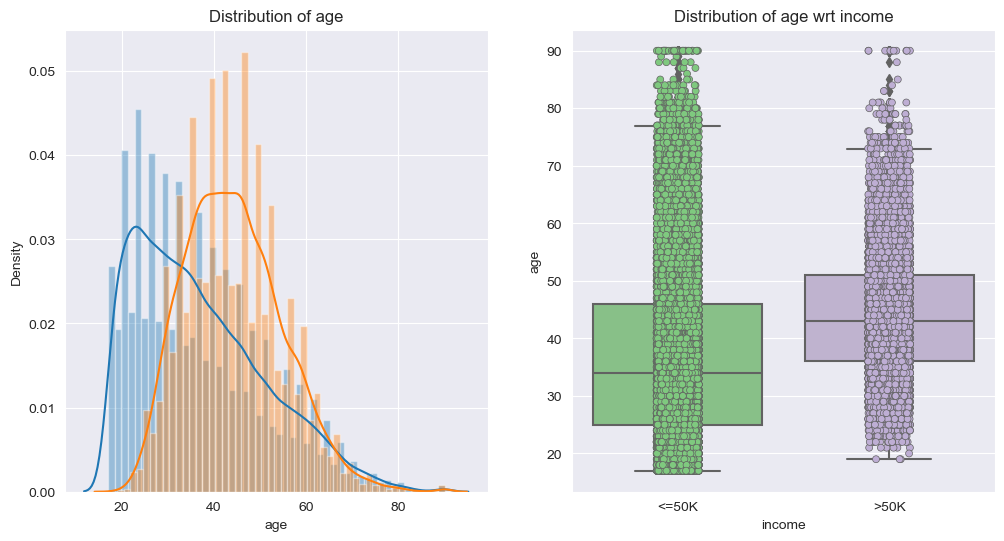

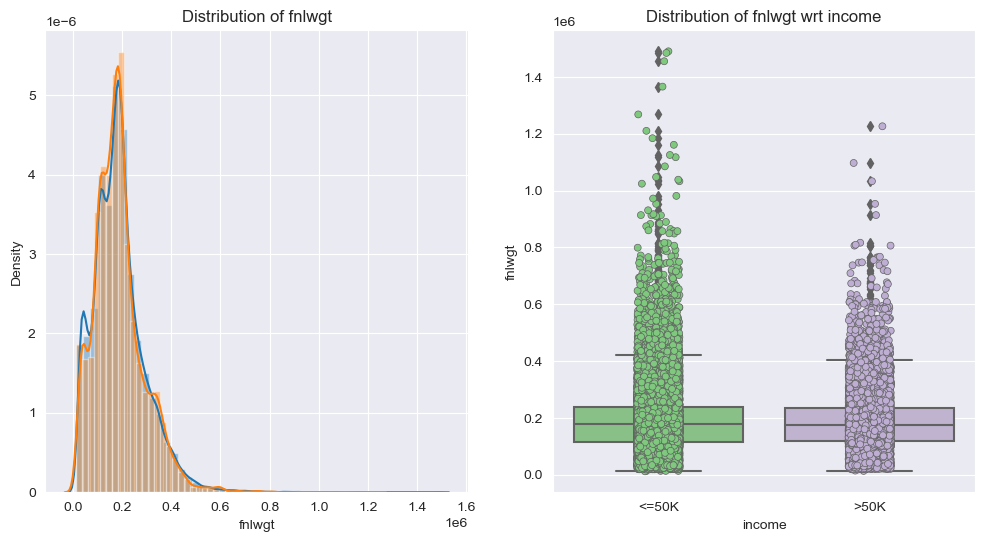

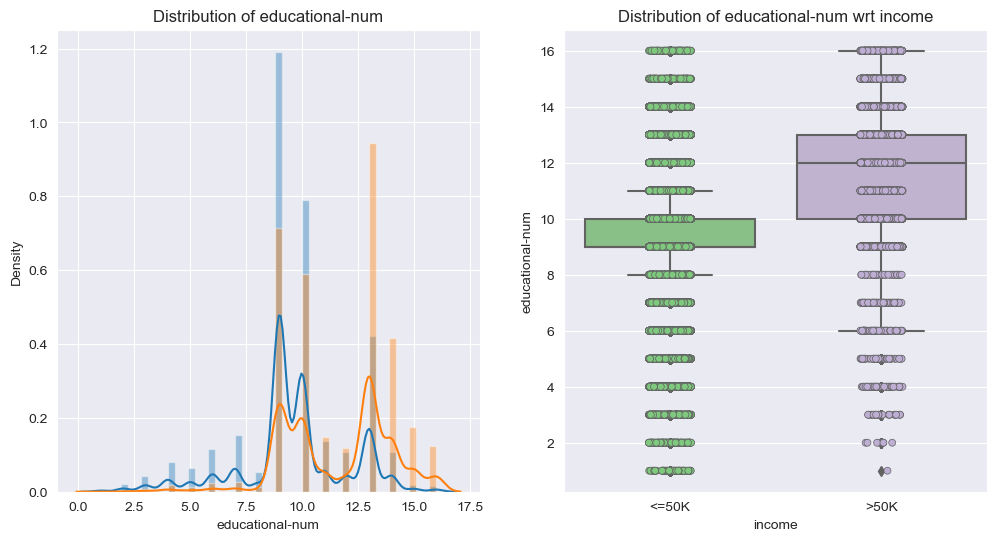

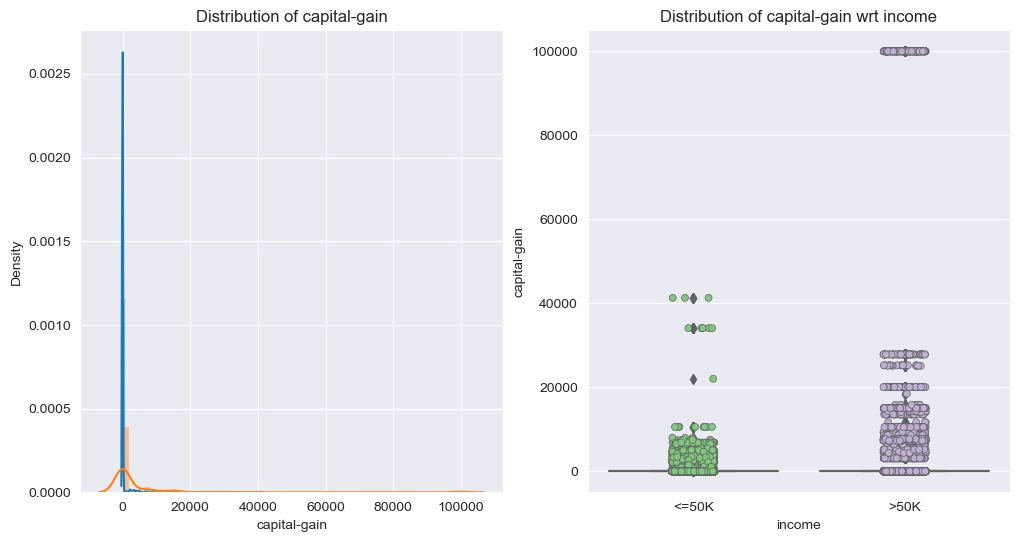

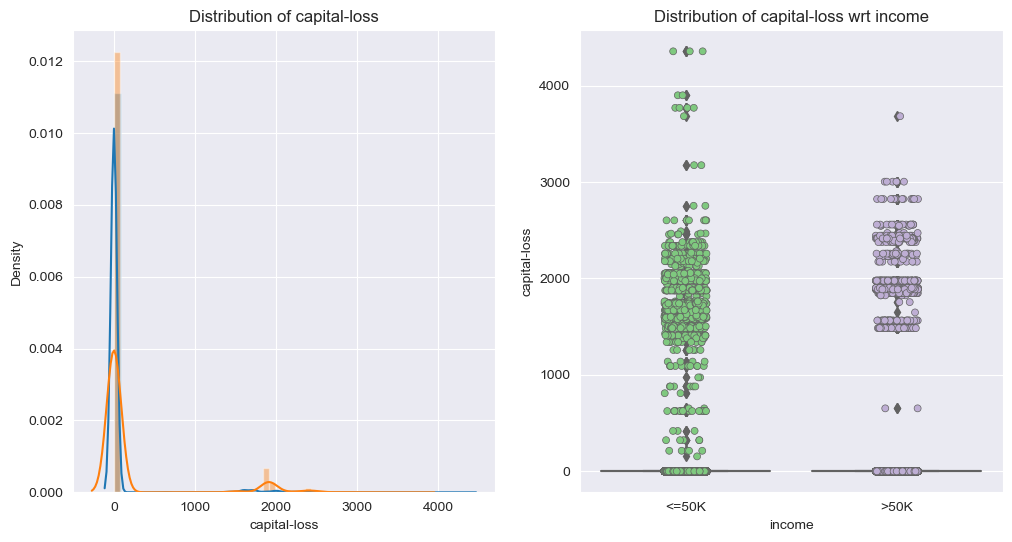

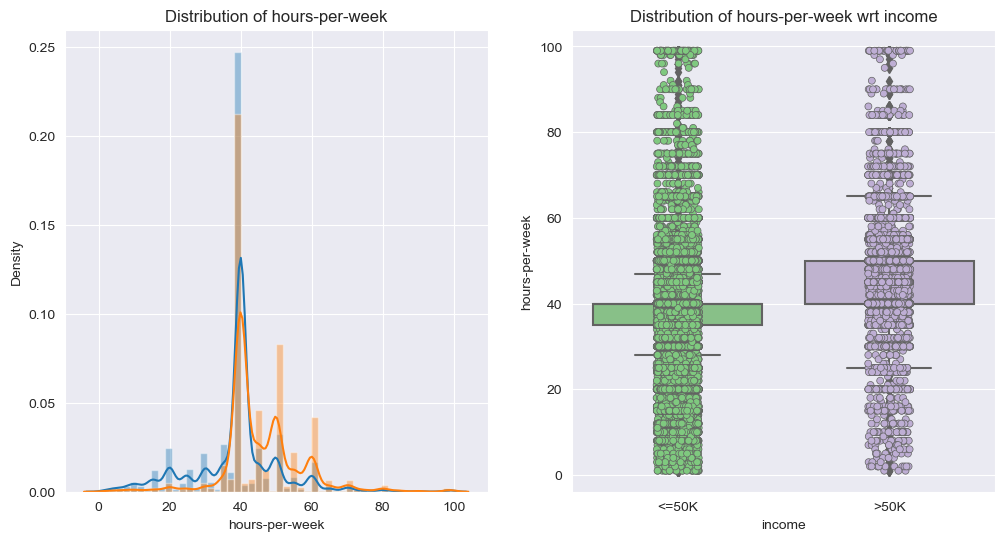

In [33]:
for col in num_cols:
    num_plot(col)

### Multivariate Analysis

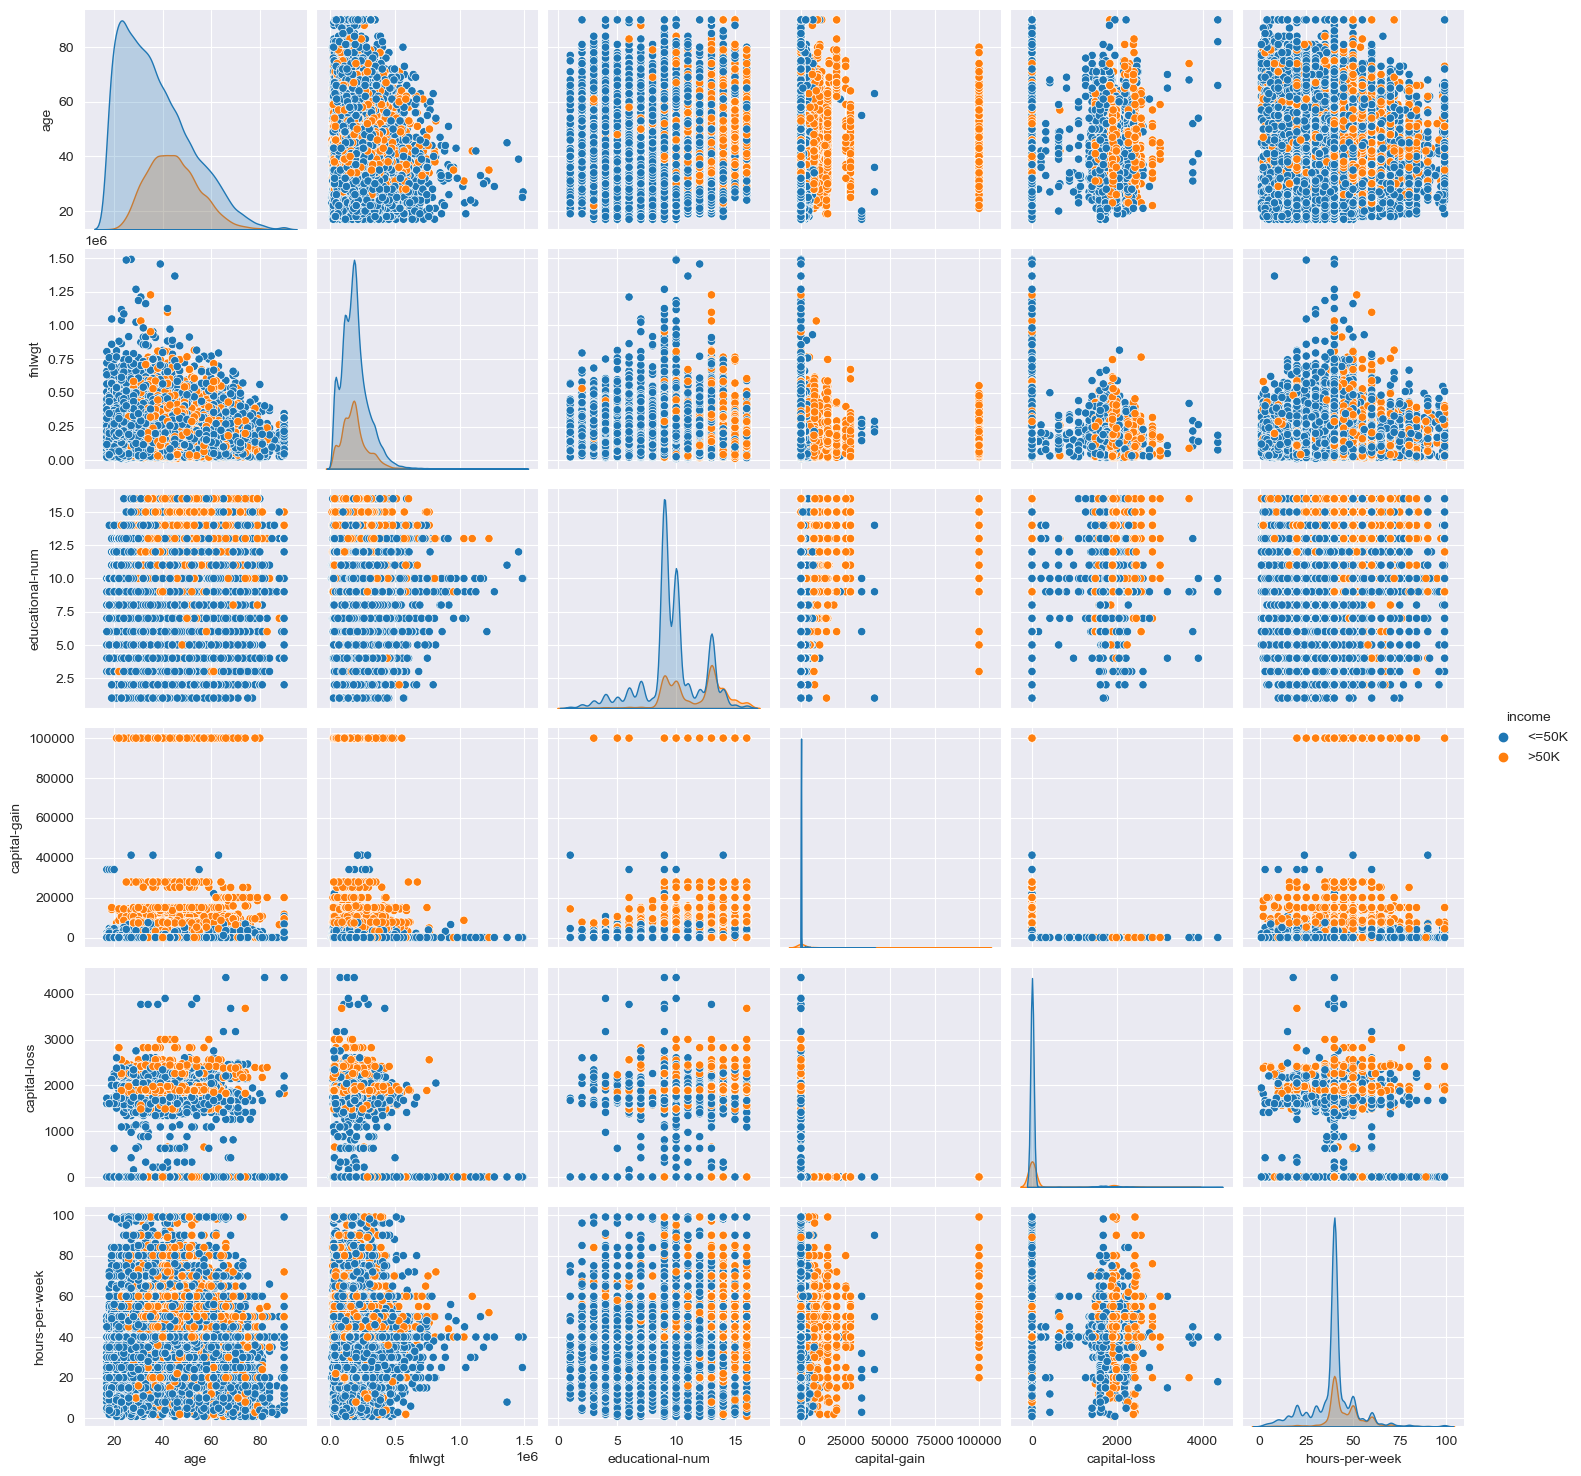

In [34]:
sns.pairplot(df, hue ='income')

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

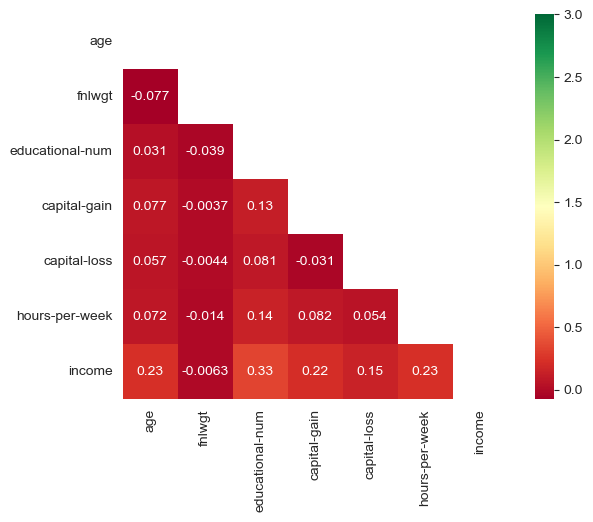

In [36]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,5))
    ax=sns.heatmap(corr, mask=mask, vmax=3, square=True,
                  annot=True, cmap='RdYlGn')
plt.show()

## Label Encoding

In [37]:
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [38]:
le = LabelEncoder()
for col in cat_cols[:-1]:
    df[col]= le.fit_transform(df[col])

In [39]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,0,3,4,0,0,0,30,38,0


## Feature Selection

In [40]:
X = df.drop('income', axis=1)
y =df['income']

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)
selector.fit(X, y)
feature_imp = selector.feature_importances_

In [42]:
feature_imp

array([0.15608902, 0.03933184, 0.17729727, 0.03650981, 0.08263965,
       0.0745341 , 0.07139748, 0.09200281, 0.0142841 , 0.02941474,
       0.08933501, 0.02765342, 0.0946037 , 0.01490704])

In [43]:
feature_imp_df = pd.DataFrame([X.columns, feature_imp]).rename(index={0:'feature', 1:'score'}).T
feature_imp_df = feature_imp_df.sort_values(by = 'score',ascending=False).reset_index(drop=True)
feature_imp_df = feature_imp_df.set_index('feature')
feature_imp_df

,score
feature,
fnlwgt,0.177297
age,0.156089
hours-per-week,0.094604
relationship,0.092003
capital-gain,0.089335
educational-num,0.08264
marital-status,0.074534
occupation,0.071397
workclass,0.039332


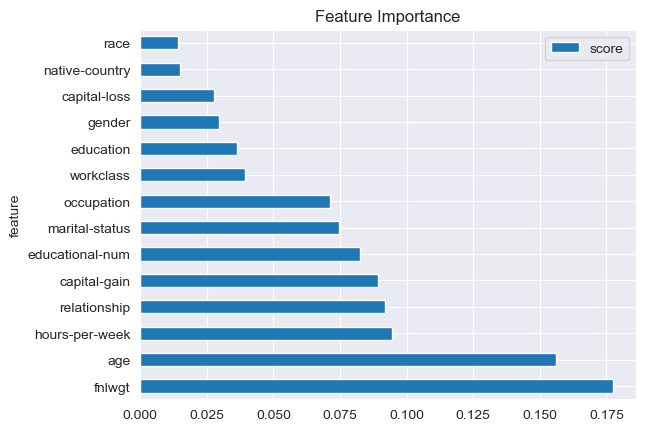

In [44]:
feature_imp_df.plot(kind='barh')
plt.title('Feature Importance')
plt.show()

In [45]:
## selecting features whose score < 0.05 for drop
drop_cols = feature_imp_df.loc[feature_imp_df['score']<0.05].index
drop_cols

Index(['workclass', 'education', 'gender', 'capital-loss', 'native-country',
       'race'],
      dtype='object', name='feature')

In [46]:
X = X.drop(columns=drop_cols)

## Fixing Imbalance in dataset

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
ros = RandomOverSampler(random_state=42)
ros.fit(X,y)
X_resampled, y_resampled = ros.fit_resample(X,y)

In [49]:
y_resampled.value_counts(normalize=True)*100

0    50.0
1    50.0
Name: income, dtype: float64

## Train-test Split

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                   test_size=0.2, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

## Modeling
**Algorithms:**
- KNN
- Logistic Regression
- SVC
- Naive Bayes 
- Decision Tree
- Random Forest
- Gradient Boosted Trees

In [52]:
from sklearn import metrics
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [53]:
from sklearn import model_selection
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    acc = round(model.score(X_test, y_test) * 100, 2) 
    probs = model.predict_proba(X_test)[:,1]
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv)
    
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    result = {'train_pred':train_pred,
             'test_pred': test_pred,
              'probs':probs,
             'acc':acc,
             'acc_cv': acc_cv}
    return result

In [54]:
def get_results(results):
    
    print("Accuracy: %s" % results['acc'])
    print("Accuracy CV 10-Fold: %s" % results['acc_cv'])
    print('=='*40)
    print("Classification Report of train set")
    print(metrics.classification_report(y_train, results['train_pred']) )
    print('=='*40)
    print("Classification Report of test set")
    print(metrics.classification_report(y_test, results['test_pred']) )
    print('=='*40)
    
    plot_roc_curve(y_test, results['probs'])

In [55]:
import time
import datetime

In [56]:
results = dict()

### KNN

Running Time: 0:00:22.330430
Accuracy: 84.18
Accuracy CV 10-Fold: 82.76
Classification Report of train set
              precision    recall  f1-score   support

           0       0.87      0.77      0.82     29721
           1       0.79      0.89      0.84     29727

    accuracy                           0.83     59448
   macro avg       0.83      0.83      0.83     59448
weighted avg       0.83      0.83      0.83     59448

Classification Report of test set
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      7434
           1       0.81      0.90      0.85      7428

    accuracy                           0.84     14862
   macro avg       0.85      0.84      0.84     14862
weighted avg       0.85      0.84      0.84     14862



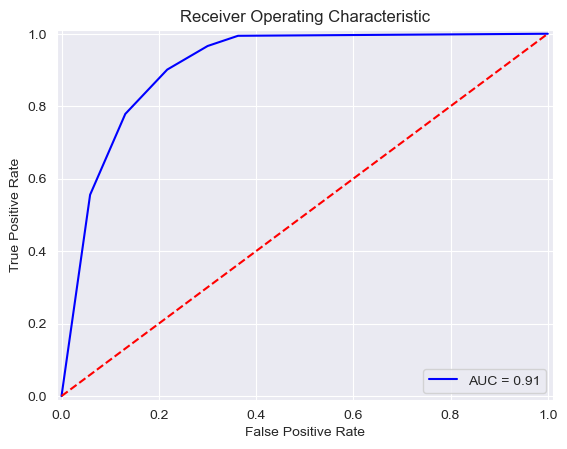

In [57]:
# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn_result = fit_ml_algo(knn, x_train, y_train, x_test, 10)
knn_time = (time.time() - start_time)

results['knn'] = knn_result

print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

get_results(knn_result)

## Logistic Regression

Running Time: 0:00:00.868753
Accuracy: 75.62
Accuracy CV 10-Fold: 75.22
Classification Report of train set
              precision    recall  f1-score   support

           0       0.75      0.76      0.75     29721
           1       0.75      0.75      0.75     29727

    accuracy                           0.75     59448
   macro avg       0.75      0.75      0.75     59448
weighted avg       0.75      0.75      0.75     59448

Classification Report of test set
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      7434
           1       0.76      0.75      0.75      7428

    accuracy                           0.76     14862
   macro avg       0.76      0.76      0.76     14862
weighted avg       0.76      0.76      0.76     14862



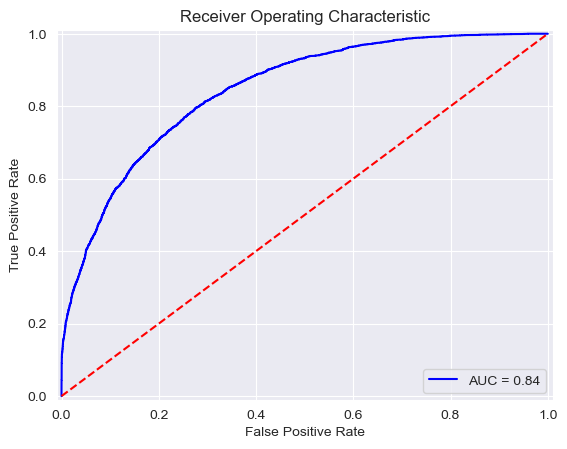

In [58]:
# logistic Regression
from sklearn.linear_model import LogisticRegression

start_time = time.time()
lr = LogisticRegression(random_state=42)
lr_result = fit_ml_algo(lr, x_train, y_train, x_test, 10)
lr_time = (time.time() - start_time)

results['lr'] = lr_result

print("Running Time: %s" % datetime.timedelta(seconds=lr_time))

get_results(lr_result)

## SVC

In [59]:
# SVC
'''
from sklearn.svm import SVC

start_time = time.time()
svc = SVC(random_state=42, probability=True)
svc_result = fit_ml_algo(svc, x_train, y_train, x_test, 10)
svc_time = (time.time() - start_time)

results['svc'] = svc_result

print("Running Time: %s" % datetime.timedelta(seconds=svc_time))

get_results(svc_result)
'''

'\nfrom sklearn.svm import SVC\n\nstart_time = time.time()\nsvc = SVC(random_state=42, probability=True)\nsvc_result = fit_ml_algo(svc, x_train, y_train, x_test, 10)\nsvc_time = (time.time() - start_time)\n\nresults[\'svc\'] = svc_result\n\nprint("Running Time: %s" % datetime.timedelta(seconds=svc_time))\n\nget_results(svc_result)\n'

## Naive Bayes Classifier

Running Time: 0:00:00.357991
Accuracy: 65.6
Accuracy CV 10-Fold: 65.7
Classification Report of train set
              precision    recall  f1-score   support

           0       0.60      0.96      0.74     29721
           1       0.90      0.35      0.51     29727

    accuracy                           0.66     59448
   macro avg       0.75      0.66      0.62     59448
weighted avg       0.75      0.66      0.62     59448

Classification Report of test set
              precision    recall  f1-score   support

           0       0.60      0.96      0.74      7434
           1       0.89      0.35      0.51      7428

    accuracy                           0.66     14862
   macro avg       0.75      0.66      0.62     14862
weighted avg       0.75      0.66      0.62     14862



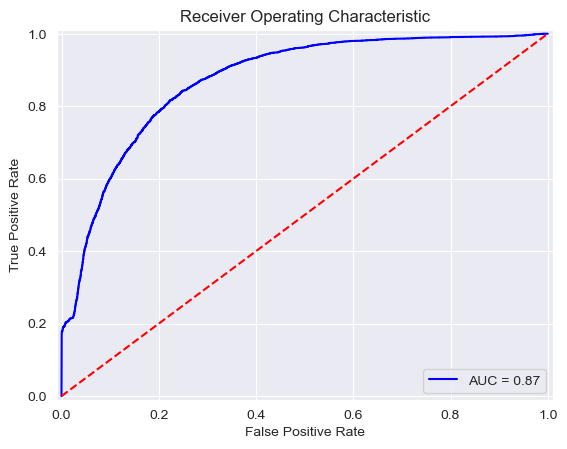

In [60]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

start_time = time.time()
nb = GaussianNB()
nb_result = fit_ml_algo(nb, x_train, y_train, x_test, 10)
nb_time = (time.time() - start_time)

results['nb'] = nb_result

print("Running Time: %s" % datetime.timedelta(seconds=nb_time))

get_results(nb_result)

## Decision Tree Classifier

Running Time: 0:00:02.743647
Accuracy: 92.14
Accuracy CV 10-Fold: 90.44
Classification Report of train set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     29721
           1       0.86      0.96      0.91     29727

    accuracy                           0.90     59448
   macro avg       0.91      0.90      0.90     59448
weighted avg       0.91      0.90      0.90     59448

Classification Report of test set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7434
           1       0.88      0.97      0.93      7428

    accuracy                           0.92     14862
   macro avg       0.93      0.92      0.92     14862
weighted avg       0.93      0.92      0.92     14862



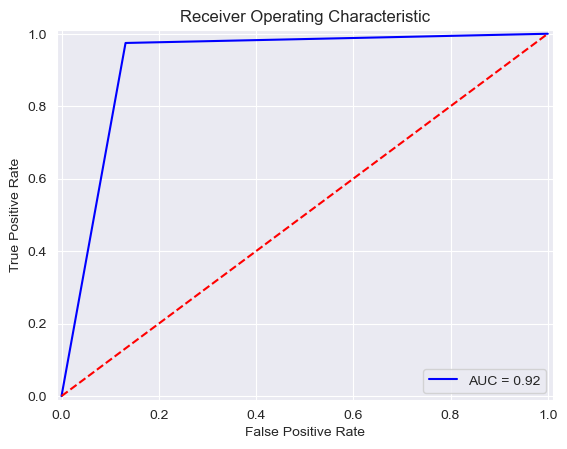

In [61]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
dt = DecisionTreeClassifier(random_state=42)
dt_result = fit_ml_algo(dt, x_train, y_train, x_test, 10)
dt_time = (time.time() - start_time)

results['dt'] = dt_result

print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

get_results(dt_result)

## Random Forest Classifier

Running Time: 0:01:06.975560
Accuracy: 92.99
Accuracy CV 10-Fold: 91.97
Classification Report of train set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     29721
           1       0.88      0.97      0.92     29727

    accuracy                           0.92     59448
   macro avg       0.92      0.92      0.92     59448
weighted avg       0.92      0.92      0.92     59448

Classification Report of test set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7434
           1       0.89      0.98      0.93      7428

    accuracy                           0.93     14862
   macro avg       0.93      0.93      0.93     14862
weighted avg       0.93      0.93      0.93     14862



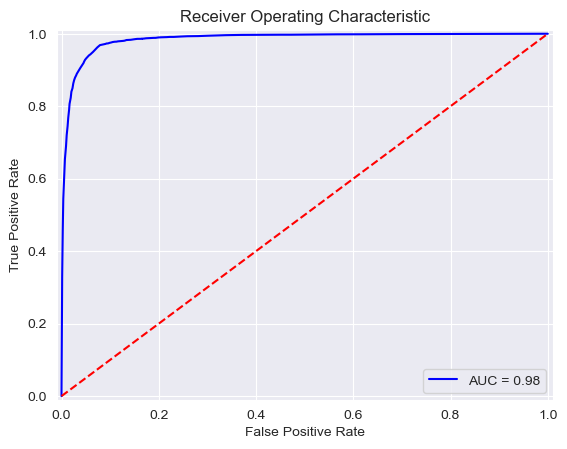

In [62]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rf = RandomForestClassifier(random_state=42)
rf_result = fit_ml_algo(rf, x_train, y_train, x_test, 10)
rf_time = (time.time() - start_time)

results['rf'] = rf_result

print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

get_results(rf_result)

## XGB Classifier

Running Time: 0:00:05.243297
Accuracy: 85.9
Accuracy CV 10-Fold: 85.5
Classification Report of train set
              precision    recall  f1-score   support

           0       0.89      0.82      0.85     29721
           1       0.83      0.89      0.86     29727

    accuracy                           0.86     59448
   macro avg       0.86      0.86      0.85     59448
weighted avg       0.86      0.86      0.85     59448

Classification Report of test set
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      7434
           1       0.84      0.89      0.86      7428

    accuracy                           0.86     14862
   macro avg       0.86      0.86      0.86     14862
weighted avg       0.86      0.86      0.86     14862



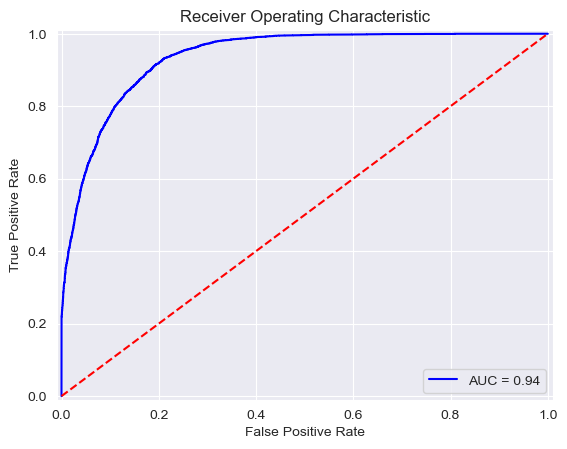

In [65]:
from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier()
xgb_result = fit_ml_algo(xgb, x_train, y_train, x_test, 10)
xgb_time = (time.time() - start_time)

results['xgb'] = xgb_result

print("Running Time: %s" % datetime.timedelta(seconds=xgb_time))

get_results(xgb_result)

## Hyperparameter Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
n_estimators = [int(x) for x in np.linspace(start= 40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [68]:
params = {
    'n_estimators': n_estimators,
    'max_depth': max_depth
}

In [69]:
optimised_rf = RandomForestClassifier(random_state=42)

rcv = RandomizedSearchCV(estimator=optimised_rf,
                        param_distributions=params,
                        cv = 10,
                        random_state=42)
rcv.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [70]:
rcv.best_params_

{'n_estimators': 118, 'max_depth': 126}

## Optimized Random Forest Classifier

Running Time: 0:01:16.725934
Accuracy: 93.0
Accuracy CV 10-Fold: 92.0
Classification Report of train set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     29721
           1       0.88      0.97      0.92     29727

    accuracy                           0.92     59448
   macro avg       0.92      0.92      0.92     59448
weighted avg       0.92      0.92      0.92     59448

Classification Report of test set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7434
           1       0.89      0.98      0.93      7428

    accuracy                           0.93     14862
   macro avg       0.93      0.93      0.93     14862
weighted avg       0.93      0.93      0.93     14862



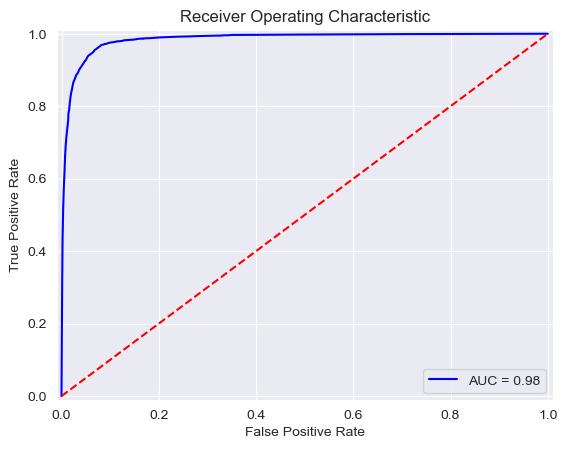

In [71]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rfopt = RandomForestClassifier(n_estimators=118, max_depth=126 ,random_state=42)
rfopt_result = fit_ml_algo(rfopt, x_train, y_train, x_test, 10)
rfopt_time = (time.time() - start_time)

results['rfopt'] = rfopt_result

print("Running Time: %s" % datetime.timedelta(seconds=rfopt_time))

get_results(rfopt_result)

## Model Evaluation

In [87]:
models = ['knn', 'lr', 'nb', 'dt', 'rf', 'xgb', 'rfopt']
keys = ['probs', 'acc', 'acc_cv']
probs = []

for model in models:
    m = results[model]
    m_probs = m['probs']
    probs.append(m_probs)
    

In [85]:
pd.DataFrame(results).drop(index=['train_pred', 'test_pred', 'probs']).T.sort_values(by='acc', ascending=False)

,acc,acc_cv
rfopt,93.0,92.0
rf,92.99,91.97
dt,92.14,90.44
xgb,85.9,85.5
knn,84.18,82.76
lr,75.62,75.22
nb,65.6,65.7


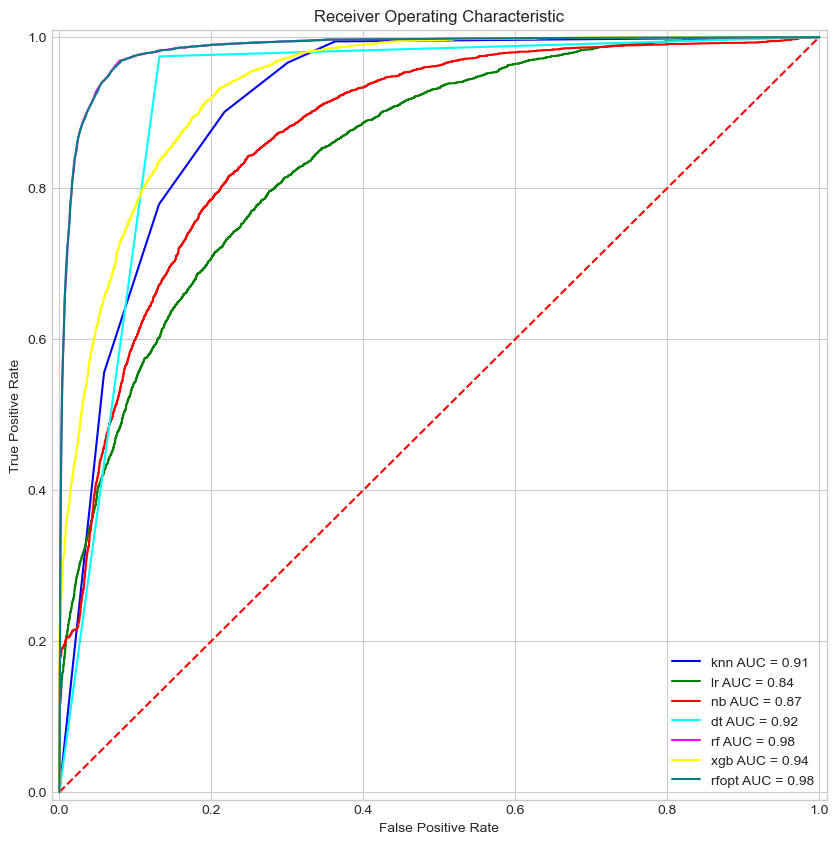

In [89]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = ['knn', 'lr', 'nb', 'dt', 'rf', 'xgb', 'rfopt']
probs
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'teal'
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

## Conclusion

- In this project, I built various models.
- A optimized random forest classifier, classifies the income with highest accuracy of 93%